# News Mood

# Analysis 
1. None of the media outlets searched had a positive average compound sentiment over their past 100 tweets.
2. The New York Times had the highest average compound sentiment at (-0.0266).
3. The largest cluster of scores is on the zero line, suggesting that news organizations write tweets designed to be neutral.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import json
import datetime
import seaborn as sns; sns.set()
sns.set_color_codes()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler("zsiW0IGoOyRCt07JUtZflCSym", "bDeg1hSbXiVEiBv70svT5ATC1TqnHiWMOAzA757K4pqR5VkIL7")
auth.set_access_token("54252997-7w475b34jXO3ryP2JqTai9rGNqANApH6ol86EvBcr", "093PpqbTQzfVleJpOQmFckmfMspjUklOSooUvYkORrXcR")
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#create a list with all the twitter handles to search
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

#create a list to add dictionaries to for the found data
found_data = []

#create a loop to go through each handle in target_users
for target in target_users:    
    
    #set a counter to 1 to find out how mant tweets ago a tweet was
    #reset when a new handle is being searched
    counter = 1
    
    #go through 5 pages of tweets for each handle to get 100 total tweets for each
    for x in range(1,6):
        
        #get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
        
        #loop through all tweets
        for tweet in public_tweets:
            
            #run vader analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            
            #set a variable equal to the value of compound, positive, negativem and neutral scores of the tweet
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
#             oldest_tweet = tweet['id'] - 1
            #append the list with a dictionary containing keys and values for: the tweet date, how many tweets ago it was tweeted
            #the accoutn that tweeted, the text of the tweet, and the compound, positive, negative, and neutral scores
            found_data.append({"Date": tweet["created_at"], 
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets Ago": counter,
                                "Source Account": target,
                               "Text": tweet["text"]
                              })
        
        
            #increment the counter by one before moving to the next tweet
            counter += 1

In [3]:
#convert the data into a dateframe
found_data_pd = pd.DataFrame.from_dict(found_data)
#save the dataframe
found_data_pd.to_csv("Found_Data_Dataframe.csv", encoding='utf-8')
found_data_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source Account,Text,Tweets Ago
0,0.0000,Mon Jun 25 21:56:48 +0000 2018,0.000,1.000,0.000,@BBCWorld,US border agents halt migrant family prosecuti...,1
1,0.7269,Mon Jun 25 21:51:27 +0000 2018,0.000,0.621,0.379,@BBCWorld,Is it fair for a politician to use Tinder to w...,2
2,0.0000,Mon Jun 25 21:29:35 +0000 2018,0.097,0.805,0.097,@BBCWorld,RT @BBCSteveR: After Russia lost 3:0 to Urugua...,3
3,0.5106,Mon Jun 25 20:01:30 +0000 2018,0.000,0.677,0.323,@BBCWorld,Trump to Waters: 'Be careful what you wish for...,4
4,-0.2040,Mon Jun 25 20:01:30 +0000 2018,0.262,0.586,0.152,@BBCWorld,RT @BBCSport: FULL TIME: #IRN 1-1 #POR.\n\nAn ...,5


# Sentiment Analysis Scatter

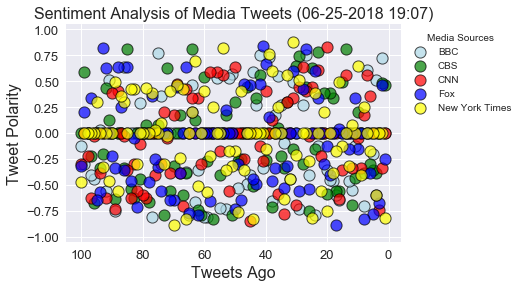

In [4]:
#seperate the data frame by Source Account to use for plotting
bbcPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@BBCWorld"]
cbsPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@CBSNews"]
cnnPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@CNN"]
foxPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@FoxNews"]
nytPlotter = found_data_pd.loc[found_data_pd["Source Account"]=="@nytimes"]

#create a plot for each handle, setting a different color for each
bbcPlt = plt.scatter(bbcPlotter["Tweets Ago"], bbcPlotter["Compound"], c='lightblue', s=125,
                    alpha = .7, edgecolors="black", label="BBC", linewidths=1 )

cbsPlt = plt.scatter(cbsPlotter["Tweets Ago"], cbsPlotter["Compound"], c='green', s=125,
                    alpha = .7, edgecolors="black", label="CBS", linewidths=1 )

cnnPlt = plt.scatter(cnnPlotter["Tweets Ago"], cnnPlotter["Compound"], c='red', s=125,
                    alpha = .7, edgecolors="black", label="CNN", linewidths=1 )

foxPlt = plt.scatter(foxPlotter["Tweets Ago"], foxPlotter["Compound"], c='blue', s=125,
                    alpha = .7, edgecolors="black", label="Fox", linewidths=1 )

nytPlt = plt.scatter(nytPlotter["Tweets Ago"], nytPlotter["Compound"], c='yellow', s=125,
                    alpha = .7, edgecolors="black", label="New York Times", linewidths=1 )

#create a variable using datetime to find when the data was collected
now = datetime.datetime.now()
now = now.strftime("%m-%d-%Y %H:%M")

#set the font sizies to be used on the plot lables
font = {'size':16}
tic_font = {'size':13}

#give the axises labels and set the size for them
plt.xlabel("Tweets Ago", **font)
plt.ylabel("Tweet Polarity", **font)
plt.yticks(**tic_font)
plt.xticks(**tic_font)

#title the plot, showing when the data was gathered,  with a size
plt.title(f"Sentiment Analysis of Media Tweets ({now})", **font)

#set the x limit to be just larger than the number of data points
plt.xlim([nytPlotter["Tweets Ago"].max()+5,nytPlotter["Tweets Ago"].min()-5])
#set the y limit to be just larger than the potential maximun and minimuns the data can be
plt.ylim(-1.05,1.05)

#create a legend and place it off of the data
plt.legend(handles=[bbcPlt, cbsPlt, cnnPlt, foxPlt, nytPlt], bbox_to_anchor=(1, 1) , title= "Media Sources")

#save and show the figure
plt.savefig('News_Mood_Scatter.png', bbox_inches='tight')
plt.show('News_Mood_Scatter.png')

# Overall Media Sentiment Bar Chart

In [5]:
#find the average of the compound score for each handle
bbcAvg = bbcPlotter["Compound"].mean()
cbsAvg = cbsPlotter["Compound"].mean()
cnnAvg = cnnPlotter["Compound"].mean()
foxAvg = foxPlotter["Compound"].mean()
nytAvg = nytPlotter["Compound"].mean()
print(f'BBC: {bbcAvg}, CBS: {cbsAvg}, CNN: {cnnAvg}, Fox: {foxAvg}, NYT: {nytAvg}')

BBC: -0.064015, CBS: -0.060156999999999995, CNN: -0.047045000000000003, Fox: -0.08046900000000003, NYT: -0.026595000000000004


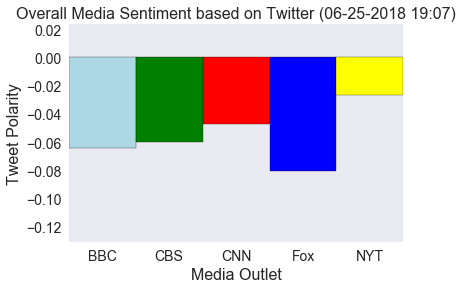

In [7]:
#create a plot for each handle, setting a different color for each
plt.bar("BBC", bbcAvg, color="lightblue", width=1.0, edgecolor='black')
plt.bar("CBS", cbsAvg, color="green", width=1.0, edgecolor='black')
plt.bar("CNN", cnnAvg, color="red",width=1.0, edgecolor='black')
plt.bar("Fox", foxAvg, color="blue",width=1.0, edgecolor='black')
plt.bar("NYT", nytAvg, color="yellow", width=1.0, edgecolor='black')

#set the y limits to be just larger than the  maximun and minimuns of the data
plt.ylim(min(bbcAvg, cbsAvg, cnnAvg, foxAvg, nytAvg)-.05,max(bbcAvg, cbsAvg, cnnAvg, foxAvg, nytAvg)+.05 )
#set the x limit to remove the space between the data bars and the edges
plt.xlim(-.5,4.5)

#remove the grid
plt.grid(False)

#give the axises labels and set the size for them
plt.xlabel("Media Outlet", **font)
plt.ylabel("Tweet Polarity", **font)

#title the plot showing when the data was gathered
plt.title(f"Overall Media Sentiment based on Twitter ({now})", **font)

#create a new size to use for the ticks and set the ticks to that size
tic_font_bar = {'size':14}
plt.yticks(**tic_font_bar)
plt.xticks(**tic_font_bar)

#save and show the plot
plt.savefig('Overall_Compound.png', bbox_inches='tight')
plt.show("Overall_Compound.png")